### Generates M1/M2 yaml files for different case-studies on initial loads.

In [13]:
import numpy as np
from scipy.linalg import block_diag

from pathlib import Path
# import DOS library
import dos
import dos.plot_tools as ptools

from ruamel import yaml
from ruamel.yaml import YAML
y = YAML()
y.default_flow_style = None

import scipy.io as spio
import os
from os import path
import matplotlib.pyplot as plt
# Define color and marker for analysis plots
markers = ["P", "X", "d","s","x","+","."]
colors = ["blue","orange","green","red","purple","brown","pink"]

Data folder

In [14]:
dt_folder = 'testDT/M1M2_loads'

Settings

In [15]:
# Case-study label
test_case = 'random' # 'random_RBM' # 'BM_dist' #
# Identification number
r_id = 1
# Number of M1 bending modes
n_bm = 27

In [16]:
# Initialize states dictionary
if 'm1_x0_dt' not in locals():
    m1_x0_dt = {'mirror' : 'M1',
                'mirror_args': {'mirror_modes': 'bending modes','N_MODE': n_bm},
                'state': {'Txyz':[],'Rxyz':[],'modes':[]}}
if 'm2_x0_dt' not in locals():
    m2_x0_dt = {'mirror' : 'M2',
                'mirror_args': {},
                'state': {'Txyz':[],'Rxyz':[]}}

m1_x0_dt['state']['Txyz'] = np.zeros((7,3)).tolist()
m1_x0_dt['state']['Rxyz'] = np.zeros((7,3)).tolist()
m1_x0_dt['state']['modes'] = np.zeros((7,n_bm)).tolist()
m2_x0_dt['state']['Txyz'] = np.zeros((7,3)).tolist()
m2_x0_dt['state']['Rxyz'] =  np.zeros((7,3)).tolist()        
# Update number of M1 bending modes in yaml file
m1_x0_dt['mirror_args']['N_MODE'] = n_bm

83.85717312399572
65.11504732102537
64.48168504568983
70.20362502480987
73.95708884993637
68.84651167430744
80.60044358117393


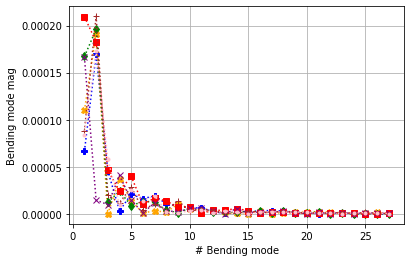

In [26]:
#
        
if(test_case == 'fully_aligned'):
    pass
#        
elif(test_case == 'BM_dist'):
    fileSTR = '_2_3bm'
    m1_x0_dt['state']['modes'][0][2] = 5.0e-4
    m1_x0_dt['state']['modes'][0][1] = 5.0e-4
#    
elif(test_case == 'random_RBM') or (test_case == 'random'):
    k_ = 3.0e-6    # 3xstd
    as2urad = 4.84814
    x_rand = (2*np.random.rand(7,39)-1)
    
    # M1 random initial values
    x0_M1_Tx = k_*block_diag(np.kron(np.eye(6),0.057),1.654).dot(x_rand[:,0])
    x0_M1_Ty = k_*block_diag(np.kron(np.eye(6),0.06),0.99).dot(x_rand[:,1])
    x0_M1_Tz = k_*block_diag(np.kron(np.eye(6),0.144),0.201).dot(x_rand[:,2])
    m1_x0_dt['state']['Txyz'] = np.vstack([x0_M1_Tx,x0_M1_Ty,x0_M1_Tz]).T.tolist()
    x0_M1_Rx = k_*as2urad*block_diag(np.kron(np.eye(6),0.01),0.014).dot(x_rand[:,3])
    x0_M1_Ry = k_*as2urad*block_diag(np.kron(np.eye(6),0.004),0.016).dot(x_rand[:,4])
    x0_M1_Rz = k_*as2urad*block_diag(np.kron(np.eye(6),0.006),0.035).dot(x_rand[:,5])
    m1_x0_dt['state']['Rxyz'] = np.vstack([x0_M1_Rx,x0_M1_Ry,x0_M1_Rz]).T.tolist()
    
    # M2 random initial values
    x0_M2_Tx = k_*block_diag(np.kron(np.eye(6),6.235),5.863).dot(x_rand[:,6])
    x0_M2_Ty = k_*block_diag(np.kron(np.eye(6),6.192),5.863).dot(x_rand[:,7])
    x0_M2_Tz = k_*block_diag(np.kron(np.eye(6),1.595),0.869).dot(x_rand[:,8])
    m2_x0_dt['state']['Txyz'] = np.vstack([x0_M2_Tx,x0_M2_Ty,x0_M2_Tz]).T.tolist()
    x0_M2_Rx = k_*as2urad*block_diag(np.kron(np.eye(6),0.474),0.463).dot(x_rand[:,9])
    x0_M2_Ry = k_*as2urad*block_diag(np.kron(np.eye(6),0.688),0.465).dot(x_rand[:,10])
    x0_M2_Rz = k_*as2urad*block_diag(np.kron(np.eye(6),2.315),2.186).dot(x_rand[:,11])
    m2_x0_dt['state']['Rxyz'] = np.vstack([x0_M2_Rx,x0_M2_Ry,x0_M2_Rz]).T.tolist()
    
    if(test_case == 'random'):
        
        # Bending modes' data
        Afz = {}
        # OA segment weights
        filepath = os.path.join('../ActiveOptics','Af_oa_axial_ver3.mat')
        Afz['outer'] = spio.loadmat(filepath)['afprime']
        _U,s_oa,V_oaT = np.linalg.svd(Afz['outer'],0)
        bm2Fz_oa = np.dot(V_oaT.T, np.diag(1/s_oa)[:,:n_bm])
        # CS (center segment) weights
        filepath = os.path.join('../ActiveOptics','Af_cs154_axial.mat')
        Afz['center'] = spio.loadmat(filepath)['afprime']
        _U,s_cs,V_csT = np.linalg.svd(Afz['center'],0)
        bm2Fz_cs = np.dot(V_csT.T, np.diag(1/s_cs)[:,:n_bm])
        
        bms = np.vstack([np.random.rand(6,n_bm).dot(np.diag(s_oa[:n_bm]/s_oa[0]))*2.5e-4,
                        np.random.rand(1,n_bm).dot(np.diag(s_cs[:n_bm]/s_oa[0]))*2.0e-4])
        for kseg in range(6):
            plt.plot(np.arange(1,n_bm+1),bms[kseg,:],':', color=colors[kseg], marker=markers[kseg])
            print(max(abs(bm2Fz_oa.dot(bms[kseg,:]))))
        plt.plot(np.arange(1,n_bm+1),bms[6,:],':', color=colors[6], marker=markers[6])
        plt.grid()
        plt.ylabel('Bending mode mag')
        plt.xlabel('# Bending mode')
        print(max(abs(bm2Fz_cs.dot(bms[6,:]))))
        m1_x0_dt['state']['modes'] = bms.tolist()


In [19]:
# Filename

if(test_case == 'BM_dist'):
    fileSTR = '_2_3bm'
elif(test_case == 'random_RBM'):
    fileSTR = '_rand_rbm_%d' %r_id
elif(test_case == 'random'):
    fileSTR = '_rbmplusbm_%d' %r_id
else:
    fileSTR = '_noload' %r_id

print(fileSTR)

_rbmplusbm_1


In [20]:
# Update yaml files with M1/M2 initial conditions    
with open(Path(dt_folder)/('M1'+fileSTR+'.yaml'),'w') as f:
    y.dump(m1_x0_dt, f)
with open(Path(dt_folder)/('M2'+fileSTR+'.yaml'),'w') as f:
    y.dump(m2_x0_dt, f)

80.72598604180851
83.37781632864117
107.21667038138031
73.61900753782376
72.53572164236809
76.41349645062814
70.64364016713472


In [72]:
1, 2, 3, 5, 8, 13, 21

(1, 2, 3, 5, 8, 13, 21)

128.60476033042795
157.2321672730265
120.53177657366423
132.39920520130005
149.45290667167873
121.49098331406893
128.3763235273333


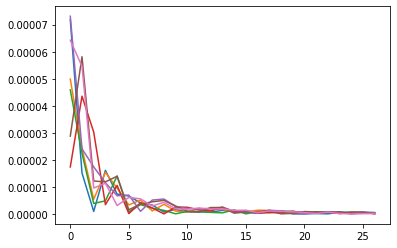